In [31]:
import requests as r
import numpy as np
import pandas as pd
import json

import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() # set the default Seaborn style for graphics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [32]:
data = pd.read_csv('shopping_trends_updated.csv')
data.head(n = 10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,2-Day Shipping,Yes,Yes,4,Cash,Quarterly


In [33]:
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [34]:
num = ["Review Rating","Age","Purchase Amount (USD)","Previous Purchases"]

In [35]:
data[num].describe()

,Review Rating,Age,Purchase Amount (USD),Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,3.749949,44.068462,59.764359,25.351538
std,0.716223,15.207589,23.685392,14.447125
min,2.500000,18.000000,20.000000,1.000000
25%,3.100000,31.000000,39.000000,13.000000
50%,3.700000,44.000000,60.000000,25.000000
75%,4.400000,57.000000,81.000000,38.000000
max,5.000000,70.000000,100.000000,50.000000


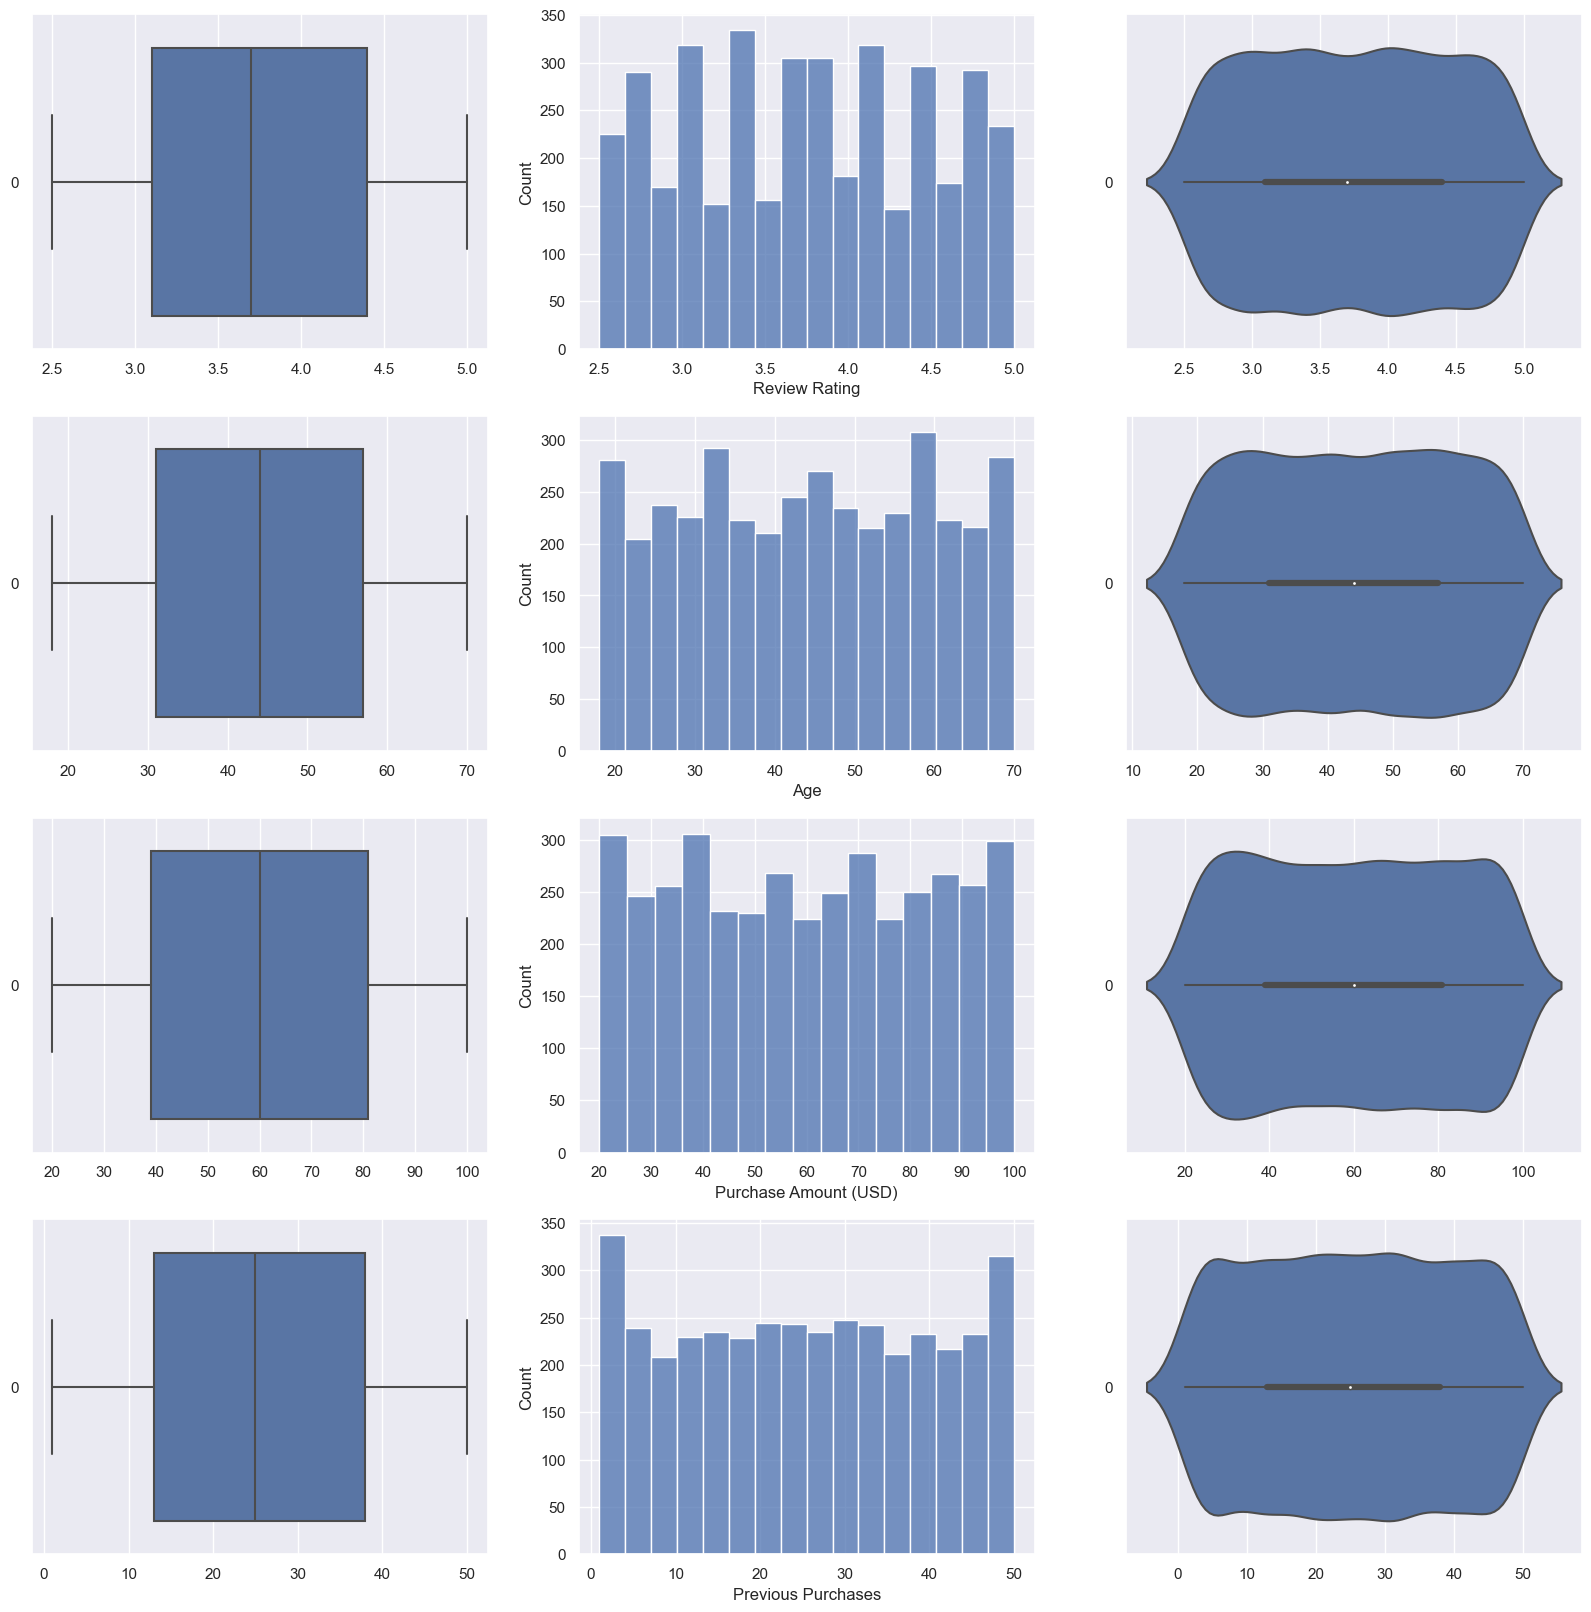

In [36]:
# Draw boxplot, histplot and violinplot of Review rate, Age, Purchase Amount(USD) and Runtime
f, axes = plt.subplots(4, 3, figsize=(20, 20))

count = 0
for i in num:
    sb.boxplot(data =data[i], orient = "h", ax = axes[count,0])
    sb.histplot(data = data[i], ax = axes[count,1])
    sb.violinplot(data = data[i], orient = "h", ax = axes[count,2])
    count += 1

In [37]:
#Check importance of numeric features in  predicting Review rate

In [38]:
Feature_df = data[["Review Rating","Age","Purchase Amount (USD)","Previous Purchases"]]
a = data["Review Rating"]
Review_Rating_List = []
for i in data["Review Rating"]:
    if i >= 3.75:               # Mark good purchase experience with '1' if ReviewRating >= 3.75
        Review_Rating_List.append(1) 
    else:                      # Mark bad purchase experience with '1' if ReviewRating < 3.75
        Review_Rating_List.append(0)
Feature_df = Feature_df.drop("Review Rating", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(Feature_df, Review_Rating_List, test_size = 0.2)

In [39]:
random_forest = RandomForestClassifier(n_estimators = 10)
random_forest.fit(X_train, y_train)

y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train) 
accuracy_rf = random_forest.score(X_train, y_train) * 100
print(accuracy_rf, "%")

97.62820512820512 %


In [40]:
#K-fold Cross Validation to check how good is random forest performance
rf = RandomForestClassifier(n_estimators = 10)
scores = cross_val_score(rf, X_train, y_train, cv = 10, scoring = "accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.51602564 0.51923077 0.48717949 0.56730769 0.54807692 0.46794872
 0.54166667 0.51602564 0.49679487 0.43910256]
Mean: 0.5099358974358974
Standard Deviation: 0.03658482214040906


In [41]:
importance = pd.DataFrame({"Feature": X_train.columns, "Importance": random_forest.feature_importances_})
importance = importance.sort_values("Importance", ascending = False).set_index("Feature")

In [42]:
importance.head()

,Importance
Feature,
Purchase Amount (USD),0.385475
Previous Purchases,0.308666
Age,0.305860


In [43]:
#From the importance score, we can see that Purchase Amount (USD) is the most important numeric feature in predicting Review rate

In [44]:
#Random Forest Regression

In [64]:
random_forest = RandomForestRegressor() 
X_train, X_test, y_train, y_test = train_test_split(Feature_df, a, test_size = 0.2)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

In [65]:
rf_tuning = RandomForestRegressor(random_state = 20)
param_grid = {
   'n_estimators': [20, 50, 100],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [3,4,5,6,7],
   'criterion' :['squared_error', 'absolute_error']
}


In [ ]:
#Take Note, GSCV will take long time to fit the model

In [66]:
GSCV = GridSearchCV(estimator = rf_tuning, param_grid = param_grid, cv = 3)
GSCV.fit(X_train, y_train)
GSCV.best_params_ 

D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "D:\Anaconda\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "D:\Anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parame

{'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': 'sqrt',
 'n_estimators': 20}

In [67]:
print("Best Parameters:", GSCV.best_params_)
print("Best Score:", GSCV.best_score_)
print("Best Estimator:", GSCV.best_estimator_)

Best Parameters: {'criterion': 'squared_error', 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 20}
Best Score: -0.0032762951864292087
Best Estimator: RandomForestRegressor(max_depth=3, max_features='sqrt', n_estimators=20,
                      random_state=20)


In [68]:
random_forest = RandomForestRegressor(random_state = 20)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print('Mean Absolute Error (MAE): ', sklearn.metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE): ', sklearn.metrics.mean_squared_error(y_test, y_pred)) 

Mean Absolute Error (MAE):  0.6214130402930403
Mean Squared Error (MSE):  0.5459376952801052


In [69]:
random_forest_out_of_bag = RandomForestRegressor(oob_score = True)
random_forest_out_of_bag.fit(X_train, y_train)
print(random_forest_out_of_bag.oob_score_) 

-0.1781405444502795


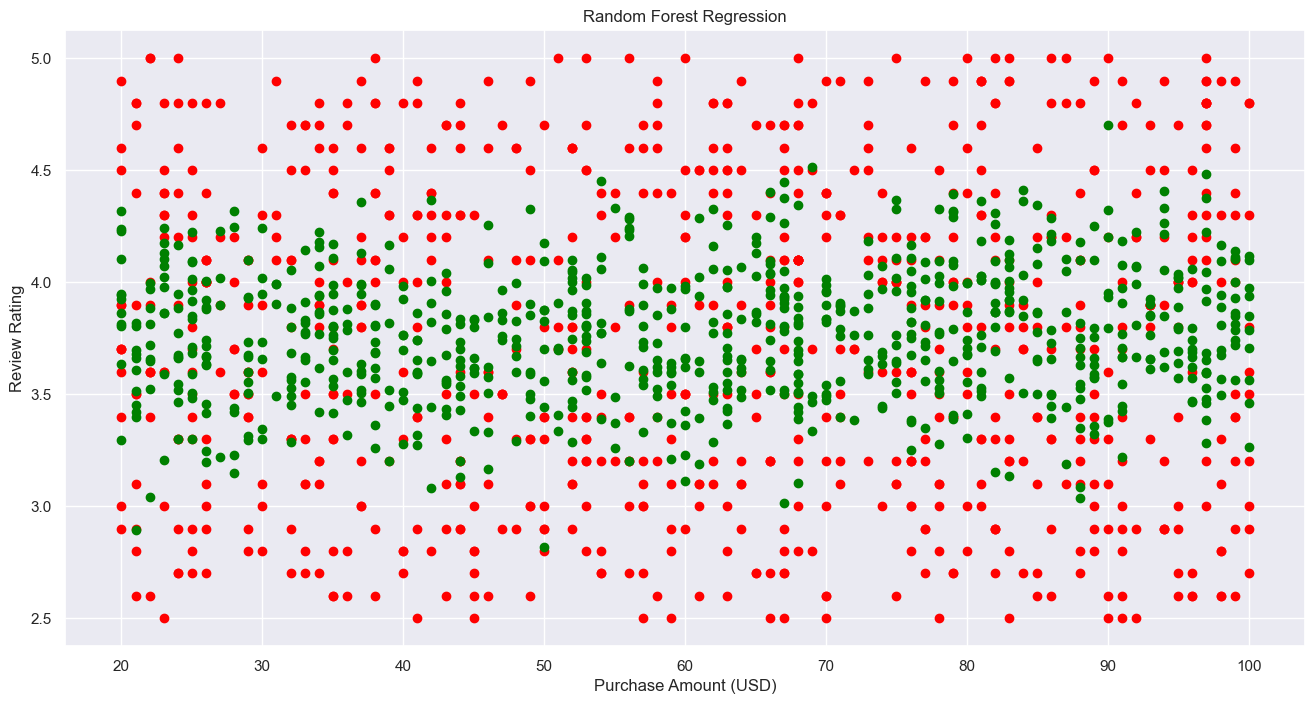

In [72]:
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test['Purchase Amount (USD)'].values, y_test, color = 'red')
plt.scatter(X_test['Purchase Amount (USD)'].values, y_pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Review Rating')
plt.show()

In [73]:
#Red is test data, green is predicted data

In [74]:
GSCV = GridSearchCV(estimator = rf_tuning, param_grid = param_grid, cv = 4)
GSCV.fit(X_train, y_train)
GSCV.best_params_ 

D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "D:\Anaconda\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "D:\Anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_para

{'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [ ]:
#try cv = 4 see got any improvement or not

In [75]:
random_forest = RandomForestRegressor(random_state = 20)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print('Mean Absolute Error (MAE): ', sklearn.metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE): ', sklearn.metrics.mean_squared_error(y_test, y_pred)) 

Mean Absolute Error (MAE):  0.6214130402930403
Mean Squared Error (MSE):  0.5459376952801052


In [76]:
random_forest_out_of_bag = RandomForestRegressor(oob_score = True)
random_forest_out_of_bag.fit(X_train, y_train)
print(random_forest_out_of_bag.oob_score_) 

-0.17734466117192604


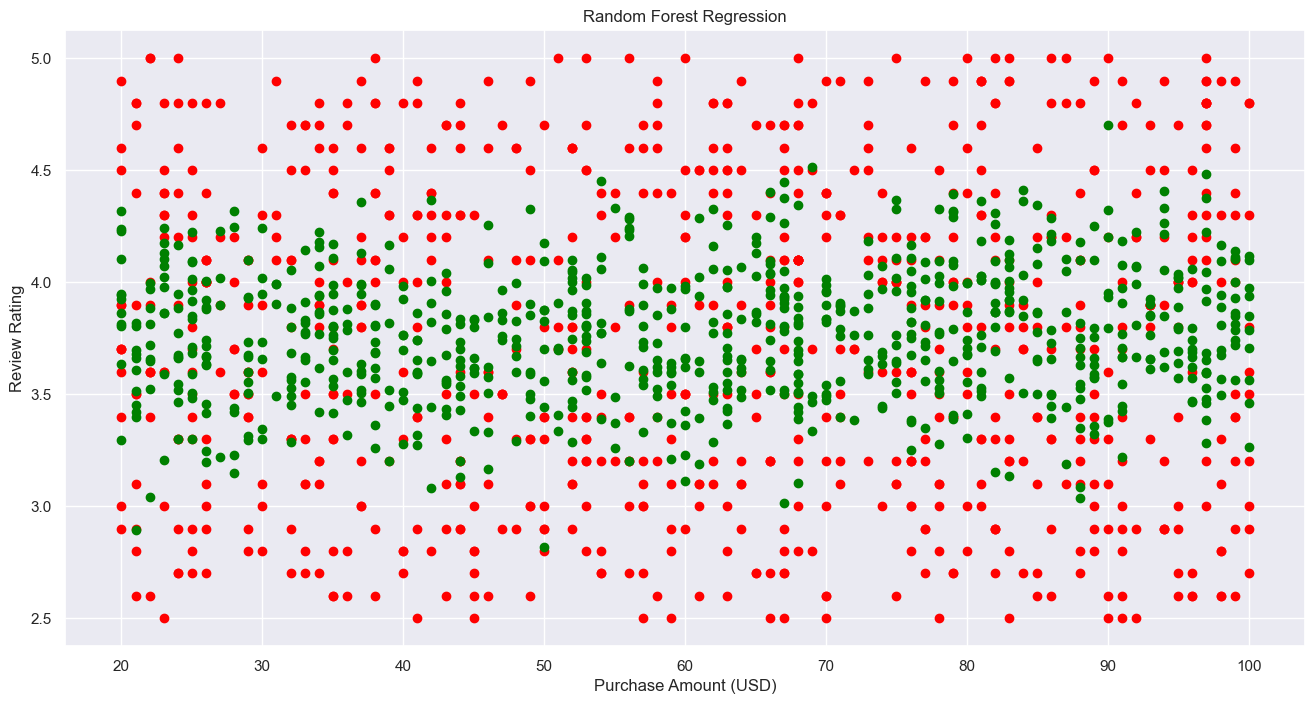

In [77]:
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test['Purchase Amount (USD)'].values, y_test, color = 'red')
plt.scatter(X_test['Purchase Amount (USD)'].values, y_pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Review Rating')
plt.show()